##### Завдання 1 #####
Завантажте набір даних про дитячі імена США з веб-сайту kaggle.com
(https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv)

In [3]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')
print(len(df))

1825433


##### Завдання 2 #####
Виведіть перші 8 рядків набору даних. 

In [2]:
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


##### Завдання 3 #####
Вивести останні 8 рядків набору даних. 

In [3]:
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


##### Завдання 4 #####
Отримайте імена стовпців набору даних. 

In [4]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

##### Завдання 5 #####
Отримайте загальну інформацію про дані у наборі даних.

In [5]:
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


##### Завдання 6 #####
Знайдіть кількість унікальних імен у наборі даних.

In [6]:
df['Name'].nunique()

93889

##### Завдання 7 #####
Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі
даних. 

In [7]:
df.groupby('Gender')['Name'].nunique()

Gender
F    64911
M    39199
Name: Name, dtype: int64

##### Завдання 8 #####
Знайдіть 5 найпопулярніших чоловічих імен у 2010 році.

In [8]:
df2010M = df.loc[(df['Year'] == 2010) & (df['Gender'] == 'M')]
df2010M.sort_values(by=['Count'], ascending=False).head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


##### Завдання 9 #####
Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого
Count максимальне).

In [9]:
maxNameCountInYear = df[df.Count == df.Count.max()][["Name", "Year"]]
print("The name is '{}' in {}".format(str(maxNameCountInYear['Name'].values[0]), int(maxNameCountInYear['Year'])))

The name is 'Linda' in 1947


##### Завдання 10 #####
Підрахуйте кількість записів, для яких Count - мінімальне у наборі.

In [10]:
len(df[(df.Count < df.Id) & (df.Count < df.Year)])

1794820

##### Завдання 11 #####
Підрахуйте кількість унікальних імен у кожному році.

In [11]:
df.groupby('Year').nunique()[['Name']].head()

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158


##### Завдання 12 #####
Знайдіть рік із найбільшою кількістю унікальних імен.

In [12]:
df.groupby('Year')[['Name']].nunique().sort_values(by=['Name'], ascending=False).head(1)

,Name
Year,
2008,32488


##### Завдання 13 #####
Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних
імен (тобто у 2008 році)

In [13]:
yearWithMaxUniqueName = df.groupby('Year')[['Name']].nunique().sort_values(by=['Name'], ascending=False).head(1).index[0]
df[df['Year'] == yearWithMaxUniqueName].sort_values(by=['Count'], ascending=False).head(1)['Name'].values[0]

'Jacob'

##### Завдання 14 #####
Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих
імен.

In [14]:
yearWithMaxUniqueName = df.groupby('Year')[['Name']].nunique().sort_values(by=['Name'], ascending=False).head(1).index[0]
nameInYearWithMaxUniqueNames = df[df['Year'] == yearWithMaxUniqueName].sort_values(by=['Count'], 
                                                                                   ascending=False).head(1)['Name'].values[0]
df[(df.Name == nameInYearWithMaxUniqueNames) & (df.Gender == 'F')].sort_values(by=['Count'], 
                                                                                   ascending=False).head(1)

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


##### Завдання 15 #####
Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові
чоловічі та жіночі імена).

In [15]:
genderNeutralNames = list(set(df[df.Gender=='F']['Name'].values) & set(df[df.Gender=='M']['Name'].values))
df[df['Name'].isin(genderNeutralNames)].groupby('Year').agg({'Name':'count'}).sort_values(by=['Name'], 
                                                                                   ascending=False).head(1)

,Name
Year,
2008,9914


##### Завдання 16 #####
Знайдіть загальну кількість народжень за рік.

In [16]:
df.groupby('Year').agg({'Count':sum}).head()

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


##### Завдання 17 #####
Знайдіть рік, коли народилося найбільше дітей.

In [17]:
df.groupby('Year').agg({'Count':sum}).sort_values(by=['Count'], 
                                                  ascending=False).head(1).index[0]

1957

##### Завдання 18 #####
Знайдіть кількість дівчаток та хлопчиків, які народились кожного року.

In [53]:
count_F_M_per_year_pd = df.groupby(['Year', 'Gender']).agg({'Count': sum}).unstack().Count
count_F_M_per_year_pd

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


##### Завдання 19 #####
Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж
хлопчиків.

In [55]:
count_F_M_per_year_pd[count_F_M_per_year_pd.F > count_F_M_per_year_pd.M].count().M

54

##### Завдання 20 #####
Накресліть графік загальної кількості народжень хлопчиків та дівчаток на
рік.

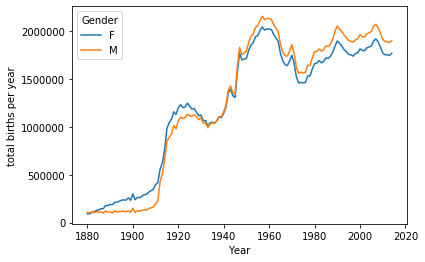

In [73]:
count_F_M_per_year_pd.plot(ylabel='total births per year');

##### Завдання 21 #####
Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та
хлопців).

In [4]:
genderNeutralNames = list(set(df[df.Gender=='F']['Name'].values) & set(df[df.Gender=='M']['Name'].values))
len(genderNeutralNames)

10221

##### Завдання 22 #####
Порахуйте, скільки разів хлопчиків називали Barbara.

In [65]:
df[(df.Name=='Barbara') & (df.Gender=='M')].Count.sum()

4139

##### Завдання 23 #####
Самостійно створіть 2 умови для аналізу даних цього набору даних та
реалізуйте їх.
1) Накресліть графік загальної кількості народжень 'Taylor' на рік.

Donny


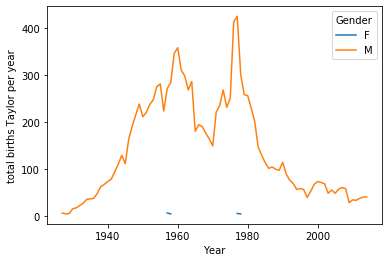

In [6]:
print(genderNeutralNames[-5])
df[df.Name==genderNeutralNames[-5]].groupby(['Year', 'Gender']).agg({'Count': sum}).unstack().Count.plot(ylabel='total births Taylor per year');

2) Знайдіть рік, коли народилося найменше дітей.

In [72]:
df.groupby('Year').agg({'Count':sum}).sort_values(by=['Count'], 
                                                  ascending=False).tail(1).index[0]

1881

In [27]:
df.sort_values(by=['Count'], ascending=False).groupby('Year').agg({'Name': 'first', 'Count': 'first'})

,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267
